# Businss Understanding

## Business Objective

## Data Sources

## Background Info - King County

- King County, Seattle Washington Wiki: https://en.wikipedia.org/wiki/King_County,_Washington
- The population was 2,252,782 in the 2019 census estimate, making it the most populous county in Washington, and the 12th-most populous in the United States. 
- King County is one of three Washington counties that are included in the Seattle–Tacoma–Bellevue metropolitan statistical area.
- About two-thirds of King County's population lives in Seattle's suburbs.
- King County has a total area of 2,307 square miles (5,980 km2), of which 2,116 square miles (5,480 km2) is land and 191 square miles (490 km2) (8.3%) is water.
- The highest point in the county is Mount Daniel at 7,959 feet (2,426 meters) above sea level.

### King County Map

![King County Seattle Map](images/King_County_Map.png)

## Executive Summary

# Data Profiling

## Import Libraries

In [201]:
# Import libraries required to load, transform, analyze and plot data
import numpy as np
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt
import matplotlib.colors as pltcol
import matplotlib.ticker as ticker
import seaborn as sns
import math
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.tools.eval_measures as ev
from sklearn.model_selection import train_test_split
import scipy.stats as stats

# Set display option to remove scientific notation and restrictions on df rows/columns display
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [ ]:
# Add jupytertheme to this notebook for better readability
!jt -t onedork -fs 95 -altp -tfs 11 -nfs 115 -cellw 88% -T

## King County Housing Data

### KC Data Dictionary

**Data Dictionary Kings County Data Set**
 - id - unique identified for a house
 - dateDate - house was sold
 - pricePrice -  is prediction target
 - bedroomsNumber -  of Bedrooms/House
 - bathroomsNumber -  of bathrooms/bedrooms
 - sqft_livingsquare -  footage of the home
 - sqft_lotsquare -  footage of the lot
 - floorsTotal -  floors (levels) in house
 - waterfront - House which has a view to a waterfront
 - view - An index from 0 to 4 of how good the view of the property was
 - condition - How good the condition is ( Overall )
 - grade - overall grade given to the housing unit, based on King County grading system
 - sqft_above - square footage of house apart from basement
 - sqft_basement - square footage of the basement
 - yr_built - Built Year
 - yr_renovated - Year when house was renovated
 - zipcode - zip
 - lat - Latitude coordinate
 - long - Longitude coordinate
 - sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
 - sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


<a href="https://www.kingcounty.gov/depts/assessor/Reports/area-reports/2017/residential-westcentral/~/media/depts/assessor/documents/AreaReports/2017/Residential/013.ashx">King County Condition and Building Grade Scoring</a>

**Condition: Relative to Age and Grade**
- 1= Poor Many repairs needed. Showing serious deterioration.
- 2= Fair Some repairs needed immediately. Much deferred maintenance.
- 3= Average Depending upon age of improvement; normal amount of upkeep for the age of the home.
- 4= Good Condition above the norm for the age of the home. Indicates extra attention and care has been taken to maintain.
- 5= Very Good Excellent maintenance and updating on home. Not a total renovation.

**Residential Building Grades**
- Grades 1 - 3 Falls short of minimum building standards. Normally cabin or inferior structure.
- Grade 4 Generally older low quality construction. Does not meet code.
- Grade 5 Lower construction costs and workmanship. Small, simple design.
- Grade 6 Lowest grade currently meeting building codes. Low quality materials, simple designs.
- Grade 7 Average grade of construction and design. Commonly seen in plats and older subdivisions.
- Grade 8 Just above average in construction and design. Usually better materials in both the exterior and interior finishes.
- Grade 9 Better architectural design, with extra exterior and interior design and quality.
- Grade 10 Homes of this quality generally have high quality features. Finish work is better, and more design quality is seen in the floor plans and larger square footage.
- Grade 11 Custom design and higher quality finish work, with added amenities of solid woods, bathroom fixtures and more luxurious options.
- Grade 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
- Grade 13 Generally custom designed and built. Approaching the Mansion level. Large amount of highest quality cabinet work, wood trim and marble; large entries. 

### KC Dataframe Basics

#### Load File

In [134]:
# Load Kings County data set (primary driver dataframe)
kc = pd.read_csv('data/kc_house_data.csv')
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,"221,900.00",3,1.00,1180,5650,1.00,nan,0.00,3,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,"538,000.00",3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,"1,991.00",98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,"180,000.00",2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,"604,000.00",4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,"510,000.00",3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


#### Info/Describe

In [84]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21596 non-null  int64         
 1   date            21596 non-null  datetime64[ns]
 2   price           21596 non-null  float64       
 3   bedrooms        21596 non-null  category      
 4   bathrooms       21596 non-null  category      
 5   sqft_living     21596 non-null  int64         
 6   sqft_lot        21596 non-null  int64         
 7   floors          21596 non-null  category      
 8   waterfront      21596 non-null  category      
 9   view            21533 non-null  float64       
 10  condition       21596 non-null  category      
 11  grade           21596 non-null  category      
 12  sqft_above      21596 non-null  int64         
 13  sqft_basement   21596 non-null  object        
 14  yr_built        21596 non-null  int64         
 15  yr

**Notes**
- Non-nulls look really good, most fields don't have issues
- Only waterfront and year renovated have significant nulls, view has a few

In [4]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00","19,221.00","21,534.00","21,597.00","21,597.00","21,597.00","21,597.00","17,755.00","21,597.00","21,597.00","21,597.00","21,597.00","21,597.00"
mean,"4,580,474,287.77","540,296.57",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60","1,971.00",83.64,"98,077.95",47.56,-122.21,"1,986.62","12,758.28"
std,"2,876,735,715.75","367,368.14",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,"27,274.44"
min,"1,000,102.00","78,000.00",1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00
25%,"2,123,049,175.00","322,000.00",3.00,1.75,"1,430.00","5,040.00",1.00,0.00,0.00,3.00,7.00,"1,190.00","1,951.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,100.00"
50%,"3,904,930,410.00","450,000.00",3.00,2.25,"1,910.00","7,618.00",1.50,0.00,0.00,3.00,7.00,"1,560.00","1,975.00",0.00,"98,065.00",47.57,-122.23,"1,840.00","7,620.00"
75%,"7,308,900,490.00","645,000.00",4.00,2.50,"2,550.00","10,685.00",2.00,0.00,0.00,4.00,8.00,"2,210.00","1,997.00",0.00,"98,118.00",47.68,-122.12,"2,360.00","10,083.00"
max,"9,900,000,190.00","7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",3.50,1.00,4.00,5.00,13.00,"9,410.00","2,015.00","2,015.00","98,199.00",47.78,-121.31,"6,210.00","871,200.00"


**Notes on Describe**
- Price: skewed right. Might be outlier with 7.7M
- Bedrooms: Outlier at 33 (possibly more?)
- Sqft_Lot: Obvious outlier at 1.6M, and mean is nearly double median.
- Waterfront: Sparsely populated
- Yr_Renovated: Small proportion of homes given 75th percentile is 0

#### Data Type Conversions

In [135]:
# Data type conversions
kc['date']= pd.to_datetime(kc['date'])

#### Data Cleaning

In [6]:
# Check Waterfront value distribution - only 146 have view.
kc.waterfront.value_counts()

0.00    19075
1.00      146
Name: waterfront, dtype: int64

In [136]:
# Fill nulls with 0 for waterfront given unlikely waterfront status
kc.waterfront.fillna(0, inplace=True)

In [216]:
# Check View value distribution - only ~2K have view.
kc.view.value_counts()

0.0    19421
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [137]:
# Check total renovation counts to assess frequency
renovations = kc[(kc.yr_renovated != 0) & (kc.yr_renovated.isna()==False)]
renovations.yr_renovated.count() # Only 744 renovations

744

In [138]:
# Create indicator column for homes showing renovation years (1 = Renovation)
kc.insert(loc=16, column='renovation_ind', value=np.where((kc.yr_renovated.isnull()) | (kc.yr_renovated==0), 0, 1))
kc.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,renovation_ind,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,"221,900.00",3,1.00,1180,5650,1.00,0.00,0.00,3,7,1180,0.0,1955,0.00,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,"538,000.00",3,2.25,2570,7242,2.00,0.00,0.00,3,7,2170,400.0,1951,"1,991.00",1,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,"180,000.00",2,1.00,770,10000,1.00,0.00,0.00,3,6,770,0.0,1933,nan,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,"604,000.00",4,3.00,1960,5000,1.00,0.00,0.00,5,7,1050,910.0,1965,0.00,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,"510,000.00",3,2.00,1680,8080,1.00,0.00,0.00,3,8,1680,0.0,1987,0.00,0,98074,47.62,-122.05,1800,7503


In [17]:
# Check number of zip codes present in data
len(pd.unique(kc.zipcode))

70

#### Outliers & Filters

In [139]:
# Dropping rows by index for outliers and other conditions
mask = kc.loc[kc['bedrooms']>20].index
kc.drop(mask, inplace=True)

### Category Profiles

#### Plot Functions

In [19]:
# Define function to generate Top N values, counts and % total for a column
def topn_count(df, column, topn):
    c = df[column].value_counts(dropna=False)
    p = df[column].value_counts(dropna=False, normalize=True).mul(100).round(1).astype(str) + '%'
    cp = (100*df.groupby(column).size().cumsum()/df.groupby(column).size().sum()).round(1).astype(str) + '%'
    print(f'Top 10 Counts By {column.title()}')
    return pd.concat([c, p ,cp], axis=1, keys=['Counts', '%', 'Cum %']).iloc[:topn]

In [26]:
#  topn_count(kc, 'bedrooms', 10)

In [21]:
# Define function to generate 3 plots for X and Y columns in a dataframe: Histogram, Price Box Plot and Top N % Distribution
def distplots(df, xcol, ycol, topn):
    # Set a figure with 3 subplots and figure-level settings
    f, (ax,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(18, 6))
    sns.set_theme(style='ticks', palette='deep')
    sns.set_style('whitegrid')
    f.suptitle('Column Value Distributions', fontsize=14, fontweight ='bold')
    f.tight_layout(pad=3)
    
    # Subplot 1 - Histogram by desired xcol showing probability %
    ax = plt.subplot2grid((1, 7), (0, 0), colspan=2)
    ax = sns.histplot(data=df, x=xcol, color='skyblue', stat='probability', discrete = True, ax=ax)
    ax.set_title('Histogram')

    # Subplot 2 - Scatter plot xcol vs. ycol
    ax2 = plt.subplot2grid((1, 7), (0, 2), colspan=2)
    ax2 = sns.scatterplot(df[xcol], df[ycol])
    ax2.set_title(f'{ycol.title()} vs {xcol.title()} Scatterplot')
#     ax2.set_xlabel(column)
#     ax2.set_ylabel('Sale Price in $100,000')
    
    # Subplot 3 - Boxplot by desired xcol against ycol (e.g. price) to see distributions grouped by xcol
    ax3 = plt.subplot2grid((1, 7), (0, 4), colspan=2)
    ax3 = sns.boxplot(data=df, x=xcol, y=ycol, showfliers=False, ax=ax3) # Excludes outliers for presentability 
    ax3.set_title('Boxplot')

    # Calculate medians and number of observations per group for use in positioning labels on plot
    medians = df.groupby([xcol])[ycol].median().values
    nobs = df[xcol].value_counts(sort=False).sort_index().values
    nobs = [str(x) for x in nobs.tolist()]
    nobs = ["n: " + i for i in nobs]

    # Add number of observations to the boxplot for indication of each box's relative likelihood
    pos = range(len(nobs))
    for tick, label in zip(pos, ax2.get_xticklabels()):
        ax3.text(pos[tick], medians[tick] + 0.2, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='bold')
    
    # Subplot 4 - Add dataframe top N value counts and % of group as a table in 3rd plot
    top = topn_count(df, xcol, topn)
    ax4 = plt.subplot2grid((1, 7), (0, 6))
    ax4.table(cellText=top.values,rowLabels=top.index, colLabels=top.columns, cellLoc = 'center', rowLoc = 'center', loc='center')
    ax4.axis("off")
    ax4.set_title('Top Values')

In [ ]:
# data.hist(figsize=(18,15), bins='auto');

#### Bedrooms

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Bedrooms


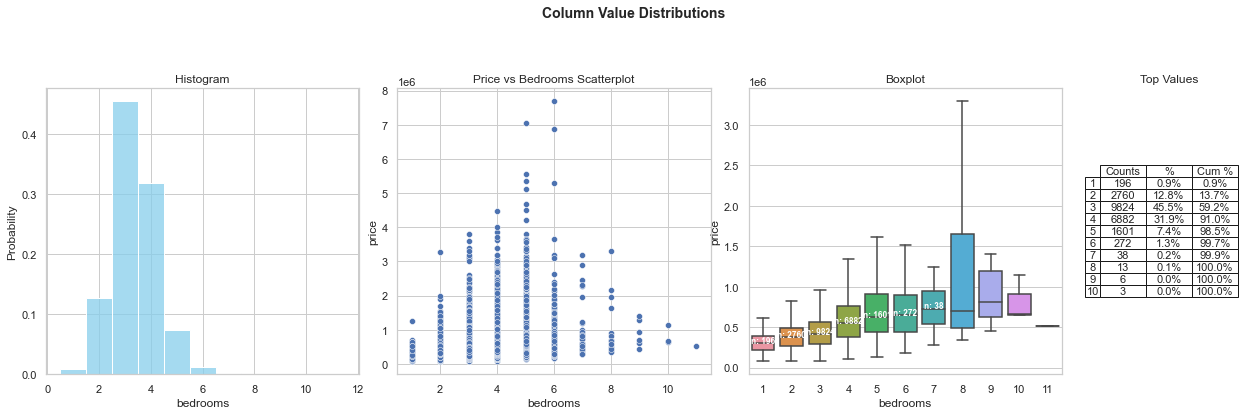

In [27]:
distplots(kc, 'bedrooms', 'price', 10)

**Notes on Bedrooms**
- One outlier at 33 BR excluded for graph presentability
- Mode is 3 BR and 78% are 3/4 BR. Only 1.5% higher than 5 BR and only 1% at 1 BR.
- Limiting to 1-6 BR looks relatively normal, might not need log transformation. This would mean dropping 0.3% of the data from modeling.
- Median price increases from 1-7 BRs, assume strong correlation. The IQR upper whisker increases more than lower whisker for higher bedrooms.

#### Bathrooms

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Bathrooms


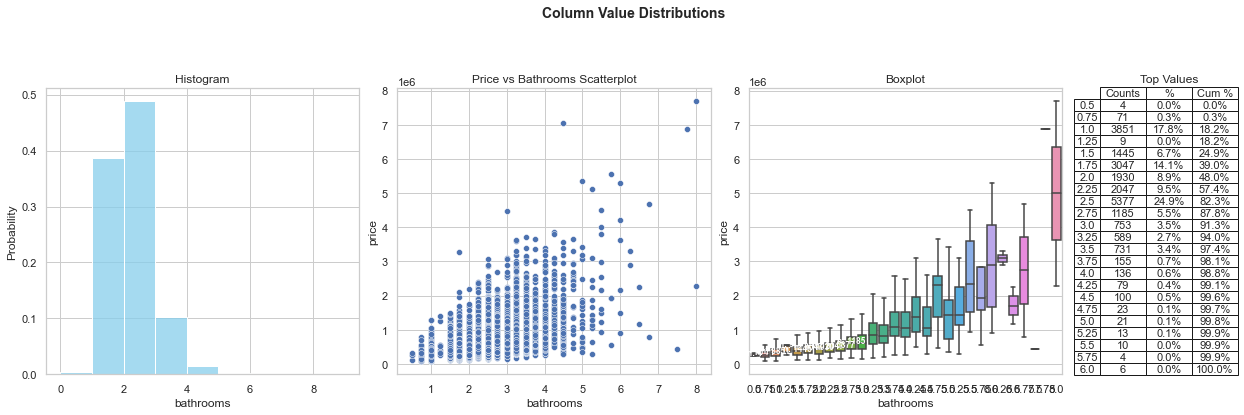

In [28]:
distplots(kc, 'bathrooms', 'price', 23)

**Notes on Bathrooms**
- Over 50% of homes have quarter or half bathrooms listed (.25, .5 or .75); Are half-baths worth 50% of a bath count in regression?
- Roughly 49% home have 2-3 baths, another 39% have 1-2 baths; 98% have 3 baths or under.
- Outliers: 75 homes (0.3%) have less than 1 bathroom. 12 homes have 6 or more. If bathrooms in model, might drop both outliers (1-6 baths).
- Distribution looks skewed right, might need log transformation.
- Median price increases with bathrooms, linear if not exponetially.

#### Floors

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Floors


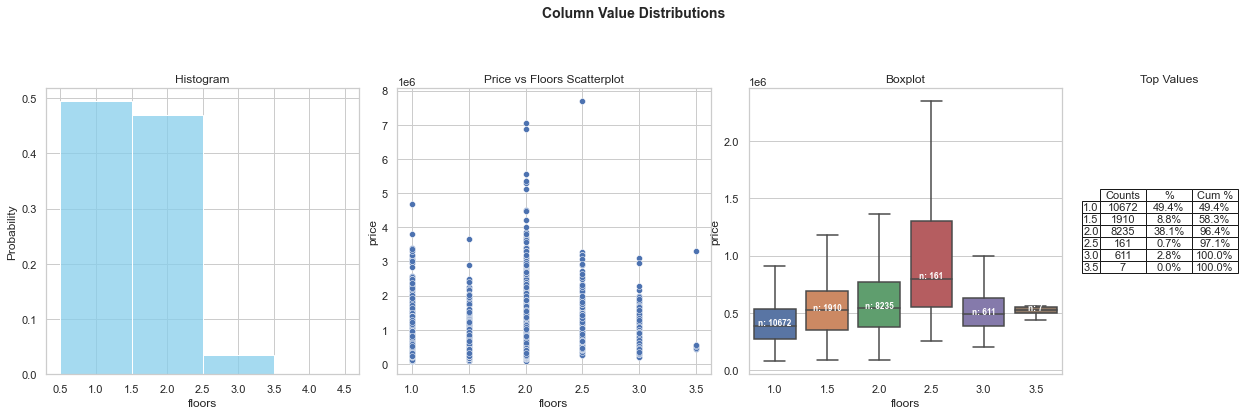

In [29]:
distplots(kc, 'floors', 'price', 10)

**Notes on Floors**
- Approximately 10% of homes have split-levels; Are half-floors worth 50% of a floor in regression?
- Roughly 49% home have single floor, another 38% have 2; Only 3% have 3 floors or higher (small samples and prices don't scale).
- Outliers: None
- Distribution not normal, would use category OHE variables.
- Median price and upper whisker band increases linearly with floors until 3+. Split level 1.5 similar to 2 floors in pricing.

#### Condition

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Condition


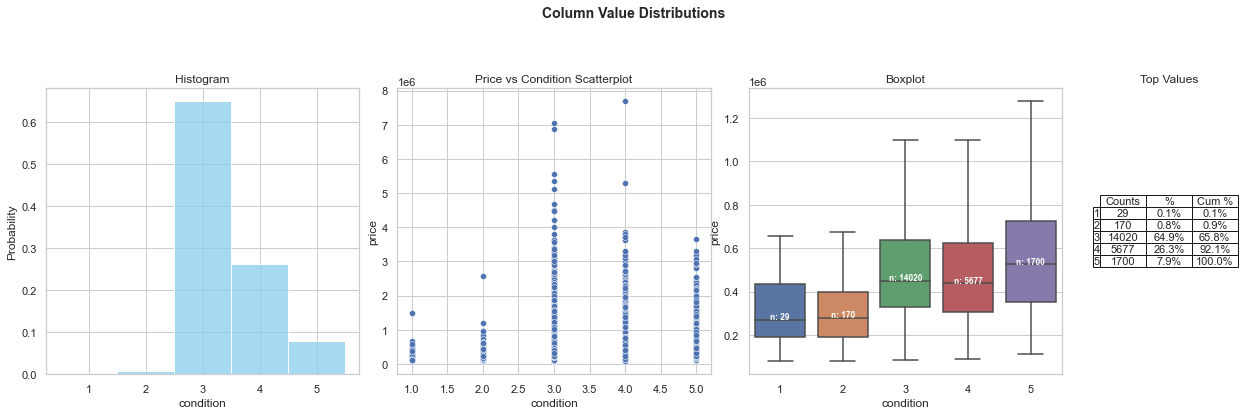

In [30]:
distplots(kc, 'condition', 'price', 5)

**Notes on Condition**
- From data dictionary: Score of 1/2 indicate major repairs required. Score 3 is average, with 4/5 be above average and exceptional.
- Roughly 2/3rd of homes are average (3), 1/4 are above average (4) and top 8% score excellent (5).
- Only 1% have 1/2 scores, probably due to market requirements to have a functional home to list for sale.
- Outliers: None denoted
- Distribution skewed left, candidate for category feature using OHE.
- Median price and IQR bands exhibit increasing step functions: 1/2 cluster-->3/4 cluster-->5

#### Grade

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Grade


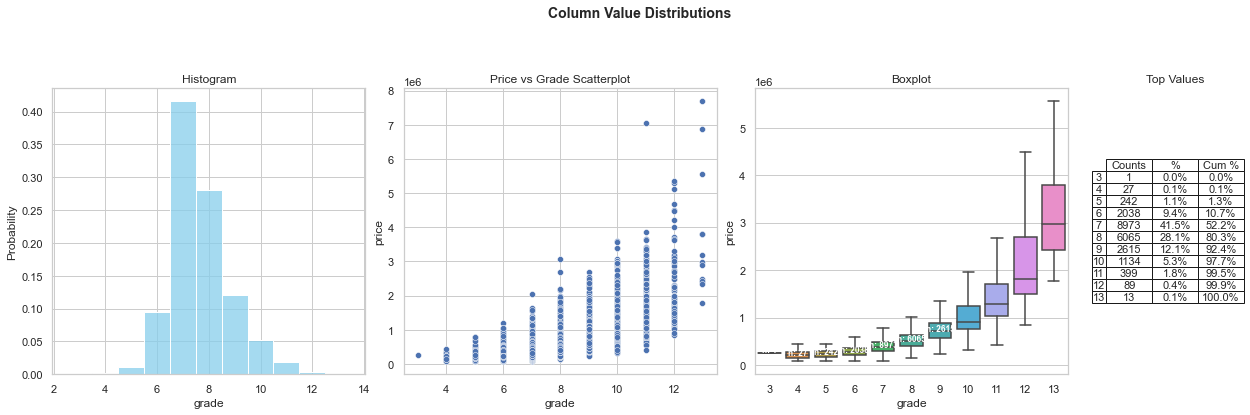

In [31]:
distplots(kc, 'grade', 'price', 13)

**Notes on Grade**
- From data dictionary: Range from 1-13 as an indication of quality level of building. 1-3 unfit, 13 mansion, 7 average.
- Roughly 41% of homes are average (7), another 37% at 6 or 8. Top 20% are 9+.
- Outliers: None denoted
- Distribution appears farily normal, candidate for continuous variable without log transformation.
- Median price and IQR bands exhibit exponetialality, pivoting at 9-13 markedly upwards.

#### Waterfront

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Waterfront


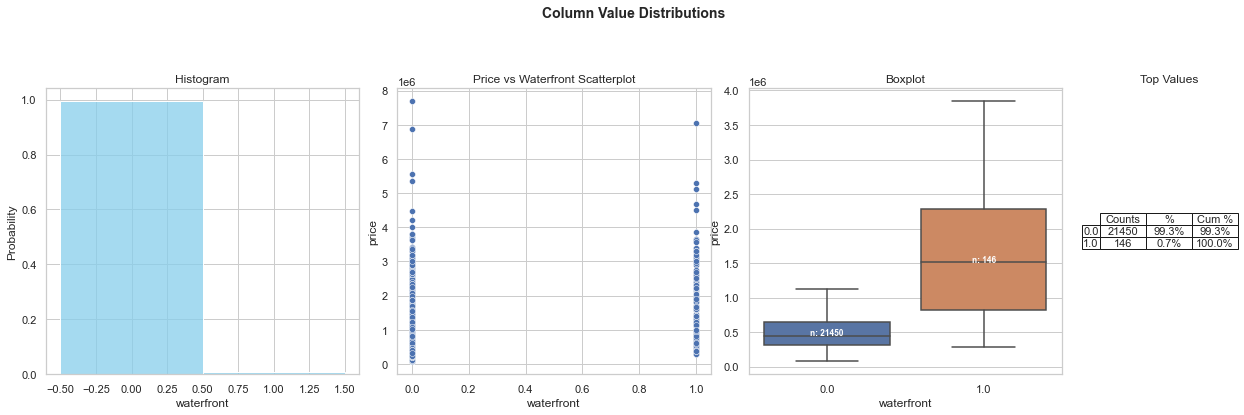

In [69]:
distplots(kc, 'waterfront', 'price', 10)

**Notes on Waterfront**
- Small sample of 146 but nearly triple the prices with high skew higher

#### Renovation Ind

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By Renovation_Ind


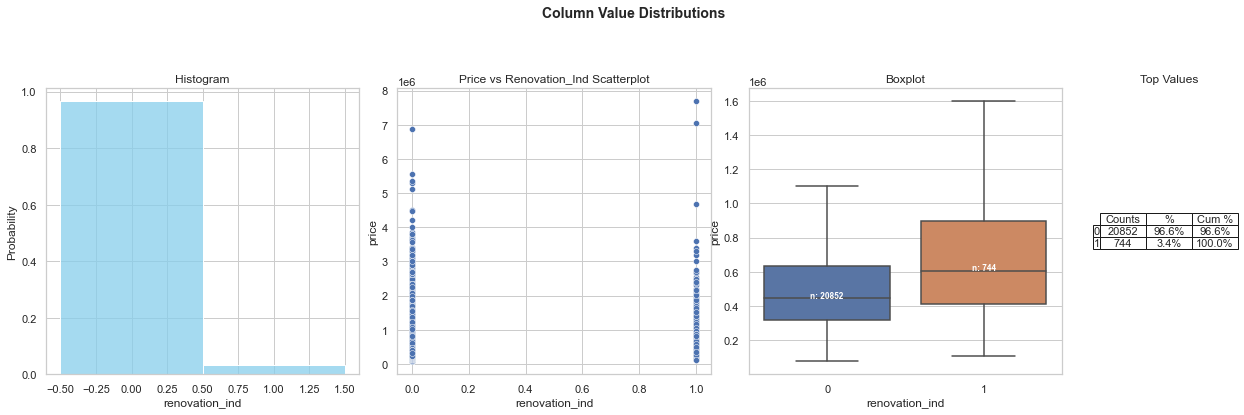

In [71]:
distplots(kc, 'renovation_ind', 'price', 10)

**Notes on Renovation Indicator**
- Small sample of 744 but median price is ~25% higher

#### View

/Users/cutterback/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Top 10 Counts By View


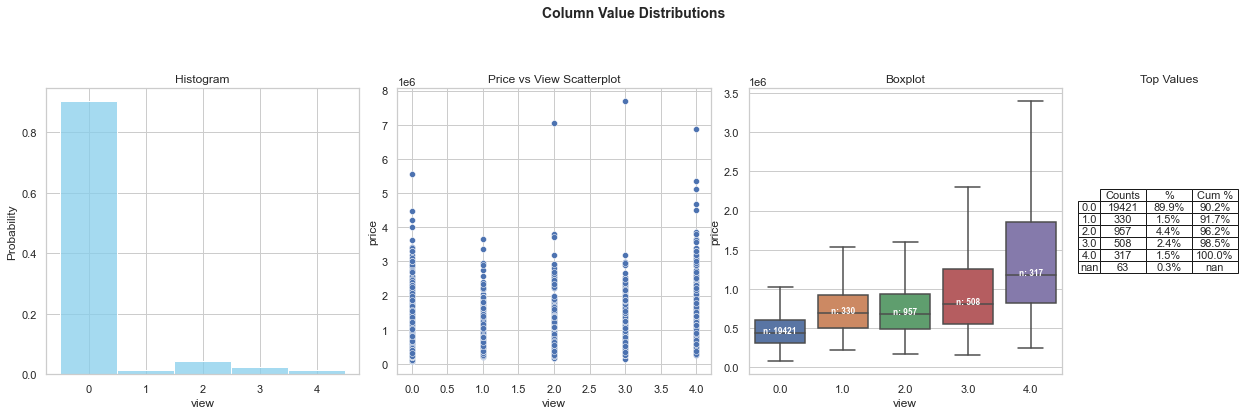

In [95]:
distplots(kc, 'view', 'price', 10)
plt.show()

**Notes on View**
- Only about 10% have a view value but media prices definitely get a lift, especially views 3/4

#### Zip

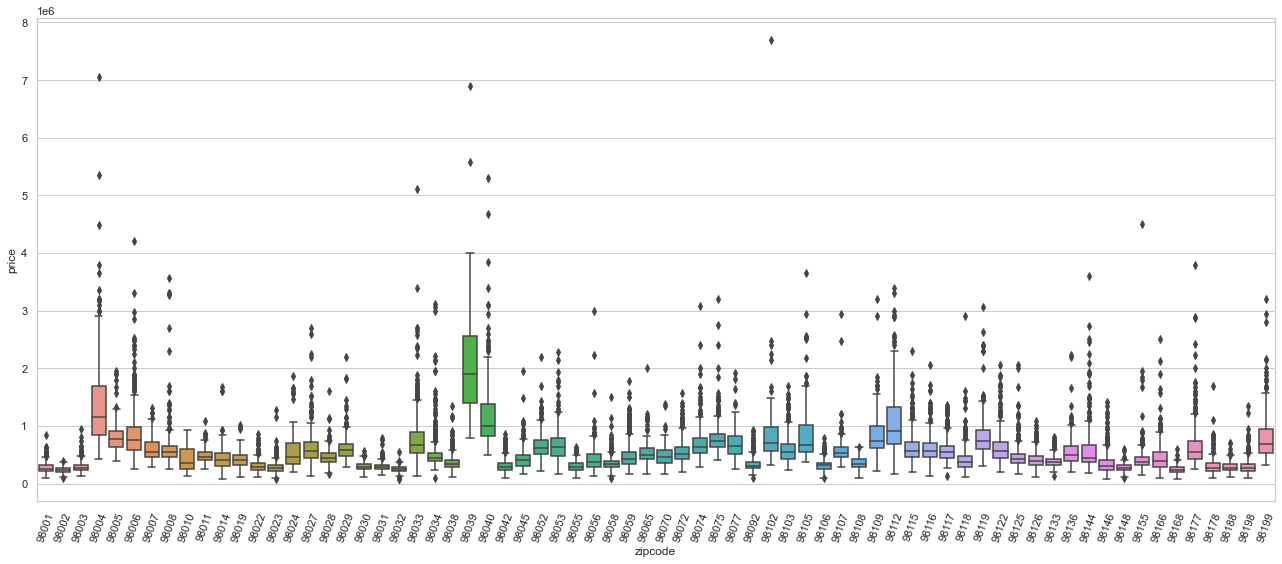

In [47]:
# Boxplot showing distributions of sales price by zipcode
plt.figure(figsize=(18,8))
sns.boxplot(data=kc, x='zipcode', y='price')
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

**Notes on Zip**
- 70 distinct zip codes
- Zipcode definitely influence prices and price distributions
- Medians above \\$1M: 3 zips, Upper Whiskers above \\$1M: 8
- Outliers above \\$4M: 6 zips 

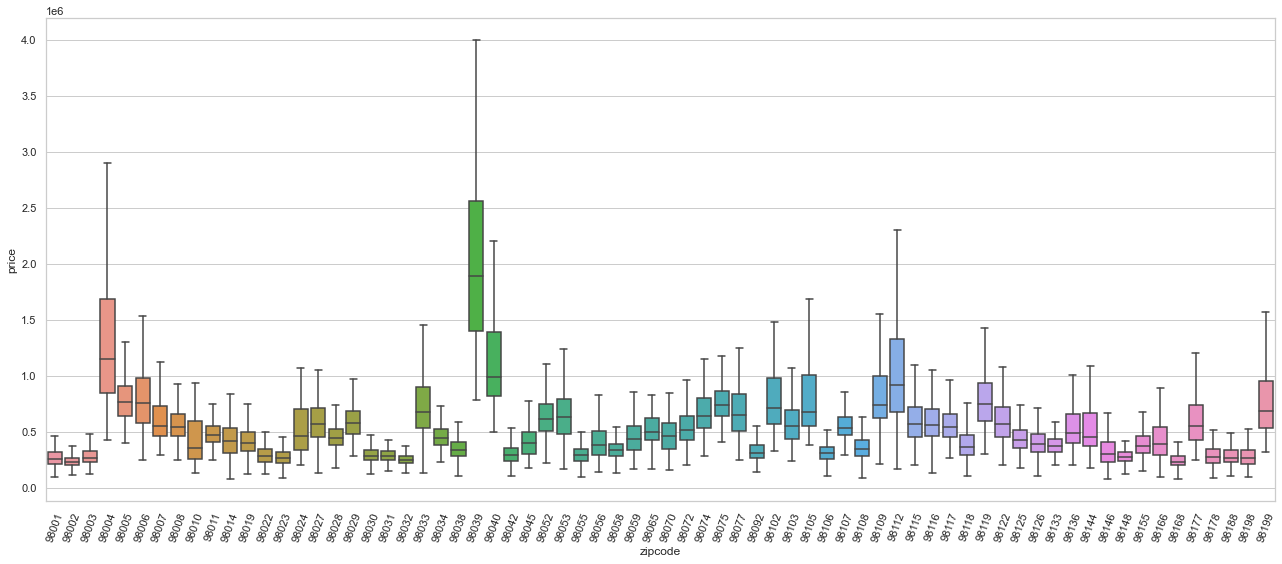

In [49]:
# Boxplot showing distributions of sales price by zipcode (no outliers shown)
plt.figure(figsize=(18,8))
sns.boxplot(data=kc, x='zipcode', y='price', showfliers=False)
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

### Sales Analysis

#### Sales Price

34.54007878960593

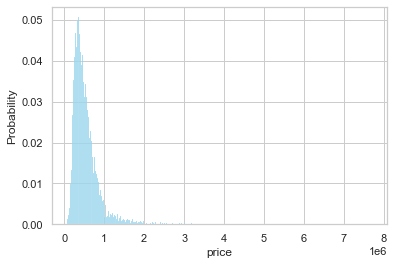

In [32]:
# Subplot 1 - Histogram by desired xcol showing probability %
sns.histplot(data=kc, x='price', color='skyblue', stat='probability')
kc['price'].skew()
kc['price'].kurtosis()

**Notes on Sales Price**
- From data dictionary: Range from 1-13 as an indication of quality level of building. 1-3 unfit, 13 mansion, 7 average.
- Roughly 41% of homes are average (7), another 37% at 6 or 8. Top 20% are 9+.
- Outliers: None denoted
- Distribution appears farily normal, candidate for continuous variable without log transformation.
- Median price and IQR bands exhibit exponetialality, pivoting at 9-13 markedly upwards.

#### Sales Time Series

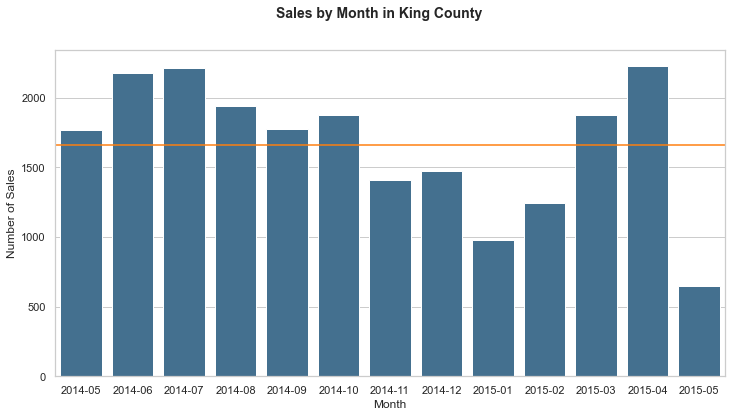

In [50]:
# Plot number of sales by month for King County home sales data
kc['sales_cnt']=1 # dummy variable to sum sales
kc['year_month'] = kc.date.dt.to_period('m') # transform date into month
df_grp = kc.groupby(['year_month'])['sales_cnt'].sum().reset_index()

# Create barplot with average line
f, ax = plt.subplots(1, 1, figsize=(12, 6))
f.suptitle('Sales by Month in King County', fontsize=14, fontweight ='bold')
sns.set_style("dark")
ax = sns.barplot(data=df_grp, x='year_month', y='sales_cnt', color='tab:blue', saturation=.5)
ax.axhline(df_grp.sales_cnt.mean(), color='tab:orange')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of Sales', fontsize=12)
plt.show()

**Notes on Sales Trend**
- Total sales transations of 21,597 spread across 13 months with 1,661 average/month in sample
- May 2015 looks to be a partial month, may excluded it to have a complete 1 year of data (2014-05 through 2015-04)
- Sales time series exhibits expected seasonality in Spring/Summer with slower Winter months

#### Sales By Year Built

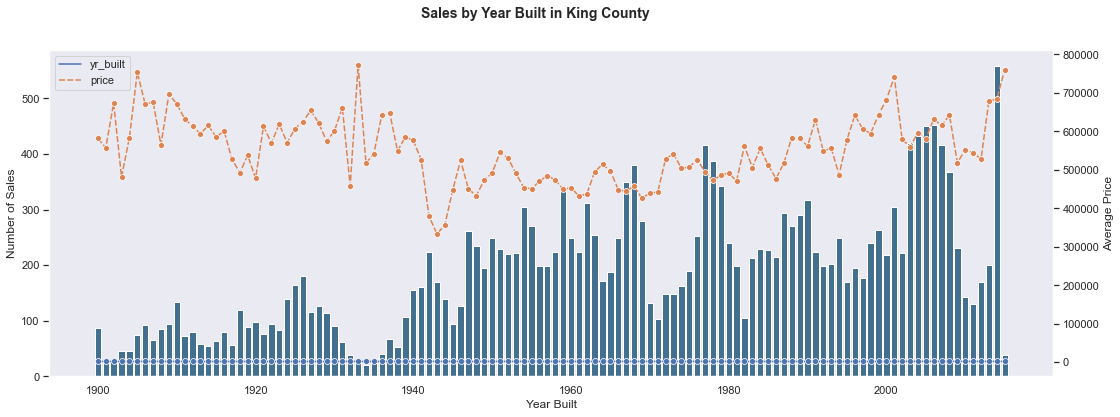

In [65]:
# Plot number of sales by month for King County home sales data
df_grp = kc.groupby(['yr_built'])['sales_cnt'].sum().reset_index()
df_grp2 = kc.groupby(['yr_built'])['price'].mean().reset_index()

# Create barplot with average line
f, ax = plt.subplots(figsize=(18, 6)) 
f.suptitle('Sales by Year Built in King County', fontsize=14, fontweight ='bold')
sns.set_style("dark")
ax = sns.barplot(data=df_grp, x='yr_built', y='sales_cnt', color='tab:blue', saturation=.5, ax=ax)
ax.set_xlabel('Year Built', fontsize=12)
ax.set_ylabel('Number of Sales', fontsize=12)
ax.xaxis.set_major_locator(ticker.AutoLocator())
ax2 = ax.twinx()
ax2 = sns.lineplot(data=df_grp2, marker='o', ax=ax2)
ax2.set_ylabel('Average Price', fontsize=12)
plt.show()

**Notes on Sales by Year Built**
- Wide range distribution going back to 1900, increasingly steadily by decade
- Initially use built year as predictor but could consider converting to decade to simplify if still correlates
- Average prices are higher for really old (historic) or newer homes

### Continuous Profiles

In [75]:
# Columns on which to generate histograms to distribution exploration
pair_col1 = ['price','sqft_living','sqft_lot','sqft_above']
pair_col2 = ['price','sqft_living','sqft_living15','sqft_lot15']

# function for scatterplot and diagonal histogram matrix for list of columns
def pairplot(df, column_list):
    g = sns.pairplot(df[column_list], palette='Set2', kind='scatter', diag_kind='kde', height=1.5)

#### Pairgrid 1

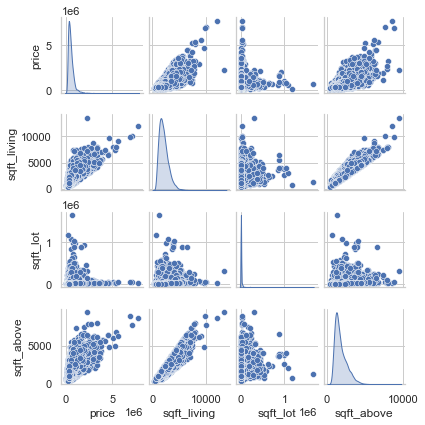

In [73]:
# plot the pairgrid for column set #1
pairplot(kc, pair_col1)

**Notes of Pairgrid 1**
- sqft_living and sqft_above have linear relations to price, pairplot between them definitely colinear
- sqft_lot doesn't seem to matter much to price, but let's check for extreme outliers to see if they impact

#### Pairgrid 2

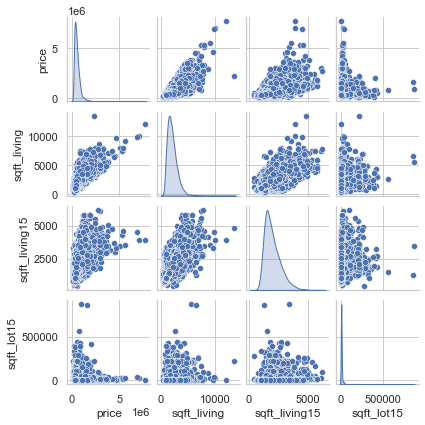

In [76]:
# plot the pairgrid for column set #2
pairplot(kc, pair_col2)

**Notes of Pairgrid 2**
- sqft_living15 (nearest 15 neighbors) has linear relations to price, but also to sqft_living (with more spread). Check collinearity
- sqft_lot15 doesn't seem to matter much to price

# Data Preparation

### Correlations

In [77]:
corr = kc.corr()
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,renovation_ind,zipcode,lat,long,sqft_living15,sqft_lot15,sales_cnt
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,0.02,-0.01,-0.01,-0.01,-0.00,0.02,-0.00,-0.14,nan
price,-0.02,1.00,0.32,0.53,0.70,0.09,0.26,0.26,0.40,0.04,0.67,0.61,0.05,0.13,0.12,-0.05,0.31,0.02,0.59,0.08,nan
bedrooms,0.00,0.32,1.00,0.53,0.59,0.03,0.18,-0.00,0.08,0.02,0.37,0.49,0.16,0.02,0.02,-0.16,-0.01,0.14,0.40,0.03,nan
bathrooms,0.01,0.53,0.53,1.00,0.76,0.09,0.50,0.06,0.19,-0.13,0.67,0.69,0.51,0.05,0.05,-0.20,0.02,0.22,0.57,0.09,nan
sqft_living,-0.01,0.70,0.59,0.76,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.32,0.06,0.05,-0.20,0.05,0.24,0.76,0.18,nan
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.00,0.02,0.08,-0.01,0.11,0.18,0.05,0.00,0.01,-0.13,-0.09,0.23,0.14,0.72,nan
floors,0.02,0.26,0.18,0.50,0.35,-0.00,1.00,0.02,0.03,-0.26,0.46,0.52,0.49,0.00,0.00,-0.06,0.05,0.13,0.28,-0.01,nan
waterfront,-0.00,0.26,-0.00,0.06,0.10,0.02,0.02,1.00,0.38,0.02,0.08,0.07,-0.02,0.08,0.07,0.03,-0.01,-0.04,0.08,0.03,nan
view,0.01,0.40,0.08,0.19,0.28,0.08,0.03,0.38,1.00,0.05,0.25,0.17,-0.05,0.10,0.09,0.09,0.01,-0.08,0.28,0.07,nan
condition,-0.02,0.04,0.02,-0.13,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.15,-0.16,-0.36,-0.06,-0.06,0.00,-0.02,-0.11,-0.09,-0.00,nan


In [78]:
corr['price'].sort_values(ascending=False)

price             1.00
sqft_living       0.70
grade             0.67
sqft_above        0.61
sqft_living15     0.59
bathrooms         0.53
view              0.40
bedrooms          0.32
lat               0.31
waterfront        0.26
floors            0.26
yr_renovated      0.13
renovation_ind    0.12
sqft_lot          0.09
sqft_lot15        0.08
yr_built          0.05
condition         0.04
long              0.02
id               -0.02
zipcode          -0.05
sales_cnt          nan
Name: price, dtype: float64

**Notes on Price Correlation**
- Strong correlations (0.6-0.8): sqft_living, grade, sqft_above
- Moderate correlations (0.4-0.6): sqft_living15, bathrooms, view

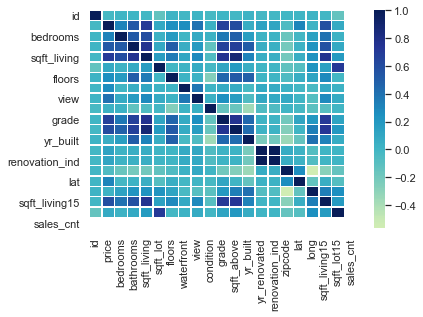

In [80]:
sns.heatmap(kc.corr(), center=0, linewidths=.5, cmap="YlGnBu")
plt.show()

### Multi-Colinearity

In [81]:
# Check for collinearity among potential predicator values by pairs
df=corr.stack().reset_index().sort_values(0, ascending=False)
# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))
# set index to pairs
df.set_index(['pairs'], inplace = True)
#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
df.columns = ['correlation']
# drop duplicates
df.drop_duplicates(inplace=True)
df[abs(df.correlation) > .65]

,correlation
pairs,
"(id, id)",1.00
"(renovation_ind, yr_renovated)",1.00
"(sqft_living, sqft_above)",0.88
"(sqft_living, grade)",0.76
"(sqft_living15, sqft_living)",0.76
"(sqft_above, grade)",0.76
"(sqft_living, bathrooms)",0.76
"(sqft_living15, sqft_above)",0.73
"(sqft_lot15, sqft_lot)",0.72


**Notes on multi-colinearity**
- Probably don't need sqft_living and sqft_above (0.88) as highly duplicatative
- sqft_living and grade at 0.76 leave in for now (grade should be independent of sqft)
- sqft_living and bathrooms at 0.76 leave in for now (common knowledge pricing is set by # bathrooms somewhat independent of sqft?)

### One-hot encoding

In [140]:
# Convert category variables data type
categoricals= ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','renovation_ind','zipcode']
kc[categoricals] = kc[categoricals].astype('category')

In [141]:
# one hot encode categoricals
kc_ohe = pd.get_dummies(kc[categoricals], drop_first=True)
kc_ohe.head()

,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,renovation_ind_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [147]:
# Concatenate OHE columns with original dataframe, dropping OHE original features
kc_comb = pd.concat([kc, kc_ohe], axis=1)
kc_comb.drop(['bedrooms','bathrooms','floors','waterfront','view','condition','grade','renovation_ind','zipcode'], axis=1, inplace=True)
kc_comb.head()

,id,date,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1.0,view_1.0,view_2.0,view_3.0,view_4.0,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,renovation_ind_1,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,2014-10-13,"221,900.00",1180,5650,1180,0.0,1955,0.00,47.51,-122.26,1340,5650,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,"538,000.00",2570,7242,2170,400.0,1951,"1,991.00",47.72,-122.32,1690,7639,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,"180,000.00",770,10000,770,0.0,1933,nan,47.74,-122.23,2720,8062,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,"604,000.00",1960,5000,1050,910.0,1965,0.00,47.52,-122.39,1360,5000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,"510,000.00",1680,8080,1680,0.0,1987,0.00,47.62,-122.05,1800,7503,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [148]:
# Drop columns that won't be used at all
kc_comb.drop(['id','date','lat','long'], axis=1, inplace=True)

### Transform Continuous Var

In [ ]:
# # Log transform and normalize
df_train_cont = df_train[continuous]
# log features'Overall.Qual','Lot.Area','Gr.Liv.Area','X1st.Flr.SF'
log_names = [f'{column}_log' for column in df_train_cont.columns]

df_train_cont_log = np.log(df_train_cont+.1)
df_train_cont_log.columns = log_names

#normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_train_cont_norm = df_train[continuous_normal]
df_train_cont_comb = pd.concat([df_train_cont_log, df_train_cont_norm], axis=1)
                               
df_train_cont_log_norm = df_train_cont_comb.apply(normalize)

### Train-Test Split

In [151]:
# Divide dataset into X predictors and y target
X = kc_comb.drop('price', axis=1)
y = kc_comb['price']

In [152]:
# Split the data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [153]:
# Validate rows in splits look as expected
print(len(X_train), len(X_test), len(y_train), len(y_test))

17276 4320 17276 4320


# Models

### Model 1

In [163]:
# Use to choose features for this model
print(X_train.columns.tolist())

['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_11', 'bathrooms_0.75', 'bathrooms_1.0', 'bathrooms_1.25', 'bathrooms_1.5', 'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75', 'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5', 'bathrooms_4.75', 'bathrooms_5.0', 'bathrooms_5.25', 'bathrooms_5.5', 'bathrooms_5.75', 'bathrooms_6.0', 'bathrooms_6.25', 'bathrooms_6.5', 'bathrooms_6.75', 'bathrooms_7.5', 'bathrooms_7.75', 'bathrooms_8.0', 'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'waterfront_1.0', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0', 'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',

In [217]:
features_m1 = ['sqft_living','sqft_living15','grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13',
              'bathrooms_0.75', 'bathrooms_1.0', 'bathrooms_1.25', 'bathrooms_1.5', 'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5', 
               'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75', 'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5', 
               'bathrooms_4.75', 'bathrooms_5.0', 'bathrooms_5.25', 'bathrooms_5.5', 'bathrooms_5.75', 'bathrooms_6.0', 'bathrooms_6.25', 'bathrooms_6.5', 
               'bathrooms_6.75', 'bathrooms_7.5', 'bathrooms_7.75', 'bathrooms_8.0', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0']

In [218]:
X_train_m1 = X_train[features_m1]
X_train_m1.head()

,sqft_living,sqft_living15,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,view_1.0,view_2.0,view_3.0,view_4.0
6243,1440,1300,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8986,1430,1310,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9419,3120,3200,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10155,2060,1760,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10436,2500,1550,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [219]:
# Fit OLS model #1 adding constant
X_train_m1_int = sm.add_constant(X_train_m1)
model_1 = sm.OLS(y_train, X_train_m1_int).fit()

In [220]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     730.6
Date:                Sat, 06 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:52:26   Log-Likelihood:            -2.3699e+05
No. Observations:               17276   AIC:                         4.741e+05
Df Residuals:                   17232   BIC:                         4.744e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.006e+04   2.48e+05      0.323      0.746   -4.05e+05    5.65e+05
sqft_living      122.7248      3.892     31.536      0.000     115.097     130.353
sqft_living15     25.7710      4.122      6.253      0.000      17.692      33.850
grade_4          -1.2e+05   2.26e+05     -0.531      0.596   -5.63e+05    3.23e+05
grade_5        -9.065e+04   2.22e+05     -0.408      0.683   -5.26e+05    3.45e+05
grade_6        -6.255e+04   2.22e+05     -0.282      0.778   -4.97e+05    3.72e+05
grade_7        -3402.9691   2.22e+05     -0.015      0.988   -4.38e+05    4.31e+05
grade_8         7.949e+04   2.22e+05      0.358      0.720   -3.55e+05    5.14e+05
grade_9         2.031e+05   2.22e+05      0.915      0.360   -2.32e+05    6.38e+05
grade_10        3.547e+05   2.22e+05      1.597      0.110   -8.06e+04     7.9e+05
grade_11        5.748e+05   2.22e+05      2.584      0.010    1.39e+05    1.01e+06
grade_12         9.05e+05   2.24e+05      4.042      0.000    4.66e+05    1.34e+06
grade_13        2.188e+06   2.37e+05      9.229      0.000    1.72e+06    2.65e+06
bathrooms_0.75  8.359e+04   1.14e+05      0.734      0.463    -1.4e+05    3.07e+05
bathrooms_1.0   1.041e+05    1.1e+05      0.947      0.344   -1.11e+05     3.2e+05
bathrooms_1.25  1.973e+05   1.56e+05      1.268      0.205   -1.08e+05    5.02e+05
bathrooms_1.5   7.622e+04    1.1e+05      0.692      0.489    -1.4e+05    2.92e+05
bathrooms_1.75  7.236e+04    1.1e+05      0.657      0.511   -1.43e+05    2.88e+05
bathrooms_2.0   7.958e+04    1.1e+05      0.723      0.470   -1.36e+05    2.95e+05
bathrooms_2.25  5.946e+04    1.1e+05      0.540      0.589   -1.56e+05    2.75e+05
bathrooms_2.5  -2801.8735    1.1e+05     -0.025      0.980   -2.19e+05    2.13e+05
bathrooms_2.75  4.191e+04    1.1e+05      0.380      0.704   -1.74e+05    2.58e+05
bathrooms_3.0   8.493e+04    1.1e+05      0.769      0.442   -1.32e+05    3.01e+05
bathrooms_3.25  1.463e+05   1.11e+05      1.322      0.186   -7.05e+04    3.63e+05
bathrooms_3.5   6.257e+04   1.11e+05      0.566      0.571   -1.54e+05    2.79e+05
bathrooms_3.75  1.925e+05   1.12e+05      1.719      0.086    -2.7e+04    4.12e+05
bathrooms_4.0   1.855e+05   1.12e+05      1.653      0.098   -3.45e+04    4.06e+05
bathrooms_4.25  2.872e+05   1.14e+05      2.528      0.011    6.45e+04     5.1e+05
bathrooms_4.5   1.909e+05   1.13e+05      1.690      0.091   -3.05e+04    4.12e+05
bathrooms_4.75   6.63e+05   1.21e+05      5.476      0.000    4.26e+05       9e+05
bathrooms_5.0   3.177e+05   1.23e+05      2.586      0.010    7.69e+04    5.58e+05
bathrooms_5.25   3.16e+05   1.33e+05      2.384      0.017    5.62e+04    5.76e+05
bathrooms_5.5   3.604e+05   1.52e+05      2.372      0.018    6.25e+04    6.58e+05
bathrooms_5.75  7.927e+05   1.96e+05      4.036      0.000    4.08e+05    1.18e+06
bathrooms_6.

In [221]:
# Model 1 generate predictions 
y_pred_m1 = model_1.predict(X_train_m1_int)
print("Model 1 Root Mean Squared Error (RMSE) : {}".format(round(ev.rmse(y_train, y_pred_m1))))
print("Model 1 Mean Absolute Error (MAE) : {}".format(round(ev.meanabs(y_train, y_pred_m1))))


Model 1 Root Mean Squared Error (RMSE) : 219434.0
Model 1 Mean Absolute Error (MAE) : 147100.0


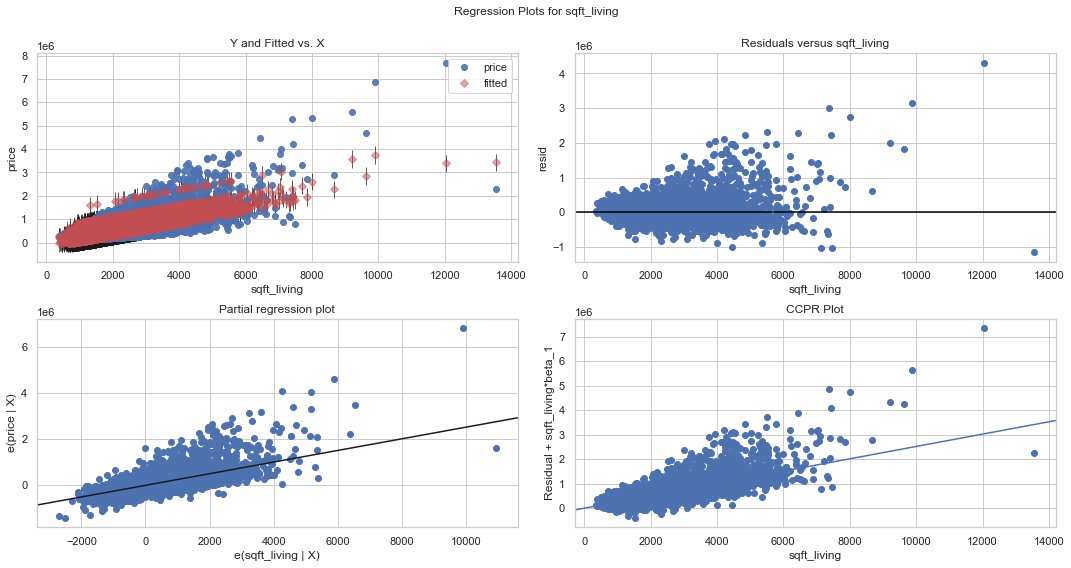

In [209]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_1, "sqft_living", fig=fig)
plt.show()

<ipython-input-210-050a0ceed2ca>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


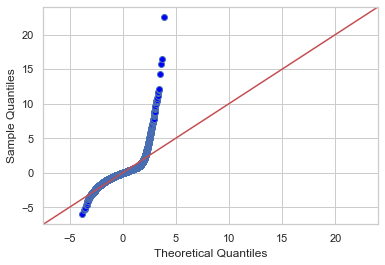

In [210]:
# Code for QQ-plot here
residuals_m1 = model_1.resid
fig = sm.graphics.qqplot(residuals_m1, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
# The Goldfeld Quandt (GQ) test is used in regression analysis to check for homoscedasticity in the error terms. The GQ test checks if you can define a point that can be used to differentiate the variance of the error term. It is a parametric test and uses the assumption that the data is normally distributed. So it is general practice to check for normality before going over to the GQ test!
# image below, you can see how observations are split into two groups. Next, a test statistic is run through taking the ratio of mean square residual errors for the regressions on the two subsets. Evidence of heteroscedasticity is based on performing a hypothesis test (more on this later) as shown in the image.

lwr_thresh = data.TV.quantile(q=.45)
upr_thresh = data.TV.quantile(q=.55)
middle_10percent_indices = data[(data.TV >= lwr_thresh) & (data.TV<=upr_thresh)].index
# len(middle_10percent_indices)

indices = [x-1 for x in data.index if x not in middle_10percent_indices]
plt.scatter(data.TV.iloc[indices], model.resid.iloc[indices])
plt.xlabel('TV')
plt.ylabel('Model Residuals')
plt.title("Residuals versus TV Feature")
plt.vlines(lwr_thresh, ymax=8, ymin=-8, linestyles='dashed',linewidth=2)
plt.vlines(upr_thresh, ymax=8, ymin=-8, linestyles='dashed',linewidth=2);

In [ ]:
# Here is a brief description of the steps involved:

# Order the data in ascending order
# Split your data into three parts and drop values in the middle part.
# Run separate regression analyses on two parts. After each regression, find the Residual Sum of Squares.
# Calculate the ratio of the Residual sum of squares of two parts.
# Apply the F-test.

# Run Goldfeld Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid.iloc[indices], model.model.exog[indices])
list(zip(name, test))

# Model Evaluation

# Business Analysis

# Deployment

# Appendix